In [1]:
# LSTM and CNN for sequence classification in the IMDB dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
names = ['L1','L2','L3','L4','L5']
dataset = pd.read_csv("F:/Masters/Semester 3/thesis/rekognition/Dataset/LSTM/lstm-dataset-final.csv", delimiter=",",names=names)
dataset = dataset.iloc[1:]
dataset.head()


Data = dataset.iloc[:, :-1].values  
target = dataset.iloc[:, 4].values



In [3]:
data = np.array(Data, dtype=float)
target = np.array(target, dtype=float)

In [4]:
data.shape

(114, 4)

In [5]:
target.shape

(114,)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state = 4)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

x_test.shape

(29, 4, 1)

In [7]:
model=Sequential()

W0804 21:38:38.663125 13012 deprecation_wrapper.py:119] From C:\Users\Aniket\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
model.add(LSTM((512),batch_input_shape=(None,None,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

W0804 21:38:39.239390 13012 deprecation_wrapper.py:119] From C:\Users\Aniket\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 21:38:39.317912 13012 deprecation_wrapper.py:119] From C:\Users\Aniket\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

W0804 21:38:40.341976 13012 deprecation_wrapper.py:119] From C:\Users\Aniket\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 512)         1052672   
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 2056      
Total params: 1,054,728
Trainable params: 1,054,728
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train,y_train, epochs=500, validation_data=(x_test,y_test))

W0804 21:38:42.108461 13012 deprecation.py:323] From C:\Users\Aniket\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 21:38:42.951749 13012 deprecation_wrapper.py:119] From C:\Users\Aniket\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0804 21:38:43.026550 13012 deprecation_wrapper.py:119] From C:\Users\Aniket\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 85 samples, validate on 29 samples
Epoch 1/500
85/85 [==============================] - 2s 25ms/step - loss: 0.2070 - acc: 0.1059 - val_loss: 0.1416 - val_acc: 0.1034
Epoch 2/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1640 - acc: 0.1059 - val_loss: 0.1192 - val_acc: 0.1034
Epoch 3/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1411 - acc: 0.1059 - val_loss: 0.1369 - val_acc: 0.1034
Epoch 4/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1359 - acc: 0.1059 - val_loss: 0.1484 - val_acc: 0.1034
Epoch 5/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1386 - acc: 0.1059 - val_loss: 0.1530 - val_acc: 0.1034
Epoch 6/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1380 - acc: 0.1059 - val_loss: 0.1484 - val_acc: 0.1034
Epoch 7/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1369 - acc: 0.1059 - val_loss: 0.1447 - val_acc: 0.1034
Epoch 8/500
85/85 [===================

Epoch 63/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1279 - acc: 0.1059 - val_loss: 0.1362 - val_acc: 0.1034
Epoch 64/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1261 - acc: 0.1059 - val_loss: 0.1323 - val_acc: 0.1034
Epoch 65/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1255 - acc: 0.1059 - val_loss: 0.1286 - val_acc: 0.1034
Epoch 66/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1251 - acc: 0.1059 - val_loss: 0.1208 - val_acc: 0.1034
Epoch 67/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1239 - acc: 0.1059 - val_loss: 0.1183 - val_acc: 0.1034
Epoch 68/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1238 - acc: 0.1059 - val_loss: 0.1222 - val_acc: 0.1034
Epoch 69/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1230 - acc: 0.1059 - val_loss: 0.1216 - val_acc: 0.1034
Epoch 70/500
85/85 [==============================] - 0s 2ms/step - loss: 0.

Epoch 125/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1008 - acc: 0.1059 - val_loss: 0.1140 - val_acc: 0.1034
Epoch 126/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1015 - acc: 0.1059 - val_loss: 0.1128 - val_acc: 0.1034
Epoch 127/500
85/85 [==============================] - 0s 2ms/step - loss: 0.1003 - acc: 0.1059 - val_loss: 0.1177 - val_acc: 0.1034
Epoch 128/500
85/85 [==============================] - ETA: 0s - loss: 0.0871 - acc: 0.062 - 0s 2ms/step - loss: 0.1005 - acc: 0.1059 - val_loss: 0.1205 - val_acc: 0.1034
Epoch 129/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0992 - acc: 0.1059 - val_loss: 0.1142 - val_acc: 0.1034
Epoch 130/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0985 - acc: 0.1059 - val_loss: 0.1144 - val_acc: 0.1034
Epoch 131/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0968 - acc: 0.1059 - val_loss: 0.1141 - val_acc: 0.1034
Epoch 132/500
85/85 [==========

85/85 [==============================] - 0s 2ms/step - loss: 0.0920 - acc: 0.1059 - val_loss: 0.1107 - val_acc: 0.1034
Epoch 187/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0921 - acc: 0.1059 - val_loss: 0.1104 - val_acc: 0.1034
Epoch 188/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0918 - acc: 0.1059 - val_loss: 0.1115 - val_acc: 0.1034
Epoch 189/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0918 - acc: 0.1059 - val_loss: 0.1122 - val_acc: 0.1034
Epoch 190/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0914 - acc: 0.1059 - val_loss: 0.1108 - val_acc: 0.1034
Epoch 191/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0909 - acc: 0.1059 - val_loss: 0.1100 - val_acc: 0.1034
Epoch 192/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0909 - acc: 0.1059 - val_loss: 0.1098 - val_acc: 0.1034
Epoch 193/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0908 -

Epoch 248/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0694 - acc: 0.1059 - val_loss: 0.1011 - val_acc: 0.1034
Epoch 249/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0678 - acc: 0.1059 - val_loss: 0.1010 - val_acc: 0.1034
Epoch 250/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0673 - acc: 0.1059 - val_loss: 0.1051 - val_acc: 0.1034
Epoch 251/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0692 - acc: 0.1059 - val_loss: 0.0961 - val_acc: 0.1034
Epoch 252/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0662 - acc: 0.1059 - val_loss: 0.1053 - val_acc: 0.1034
Epoch 253/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0678 - acc: 0.1059 - val_loss: 0.1036 - val_acc: 0.1034
Epoch 254/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0664 - acc: 0.1059 - val_loss: 0.0989 - val_acc: 0.1034
Epoch 255/500
85/85 [==============================] - 0s 2ms/step - 

85/85 [==============================] - 0s 2ms/step - loss: 0.0602 - acc: 0.1059 - val_loss: 0.0875 - val_acc: 0.1034
Epoch 310/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0573 - acc: 0.1059 - val_loss: 0.0957 - val_acc: 0.1034
Epoch 311/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0540 - acc: 0.1059 - val_loss: 0.1028 - val_acc: 0.1034
Epoch 312/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0600 - acc: 0.1059 - val_loss: 0.0955 - val_acc: 0.1034
Epoch 313/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0544 - acc: 0.1059 - val_loss: 0.0984 - val_acc: 0.1034
Epoch 314/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0540 - acc: 0.1059 - val_loss: 0.0983 - val_acc: 0.1034
Epoch 315/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0522 - acc: 0.1059 - val_loss: 0.0927 - val_acc: 0.1034
Epoch 316/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0523 -

Epoch 371/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0424 - acc: 0.1059 - val_loss: 0.0987 - val_acc: 0.1034
Epoch 372/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0453 - acc: 0.1059 - val_loss: 0.0989 - val_acc: 0.1034
Epoch 373/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0440 - acc: 0.1059 - val_loss: 0.0973 - val_acc: 0.1034
Epoch 374/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0475 - acc: 0.1059 - val_loss: 0.1023 - val_acc: 0.1034
Epoch 375/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0468 - acc: 0.1059 - val_loss: 0.1010 - val_acc: 0.1034
Epoch 376/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0449 - acc: 0.1059 - val_loss: 0.0968 - val_acc: 0.1034
Epoch 377/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0458 - acc: 0.1059 - val_loss: 0.0989 - val_acc: 0.1034
Epoch 378/500
85/85 [==============================] - 0s 2ms/step - 

85/85 [==============================] - 0s 2ms/step - loss: 0.0404 - acc: 0.1059 - val_loss: 0.0985 - val_acc: 0.1034
Epoch 433/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0428 - acc: 0.1059 - val_loss: 0.0956 - val_acc: 0.1034
Epoch 434/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0377 - acc: 0.1059 - val_loss: 0.0952 - val_acc: 0.1034
Epoch 435/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0376 - acc: 0.1059 - val_loss: 0.0959 - val_acc: 0.1034
Epoch 436/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0392 - acc: 0.1059 - val_loss: 0.1001 - val_acc: 0.1034
Epoch 437/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0393 - acc: 0.1059 - val_loss: 0.0977 - val_acc: 0.1034
Epoch 438/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0392 - acc: 0.1059 - val_loss: 0.1004 - val_acc: 0.1034
Epoch 439/500
85/85 [==============================] - 0s 2ms/step - loss: 0.0384 -

Epoch 494/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0351 - acc: 0.1059 - val_loss: 0.0982 - val_acc: 0.1034
Epoch 495/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0356 - acc: 0.1059 - val_loss: 0.0931 - val_acc: 0.1034
Epoch 496/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0408 - acc: 0.1059 - val_loss: 0.0935 - val_acc: 0.1034
Epoch 497/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0350 - acc: 0.1059 - val_loss: 0.0962 - val_acc: 0.1034
Epoch 498/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0364 - acc: 0.1059 - val_loss: 0.1009 - val_acc: 0.1034
Epoch 499/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0381 - acc: 0.1059 - val_loss: 0.0945 - val_acc: 0.1034
Epoch 500/500
85/85 [==============================] - 0s 3ms/step - loss: 0.0382 - acc: 0.1059 - val_loss: 0.0939 - val_acc: 0.1034


In [12]:
results = model.predict(x_test)

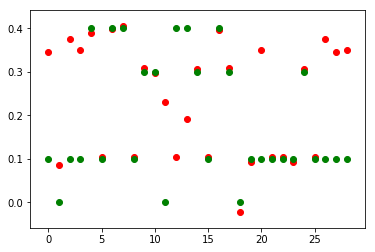

In [13]:
plt.scatter(range(29), results, c='r')
plt.scatter(range(29), y_test, c='g')
plt.show()

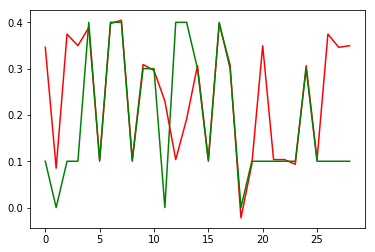

In [14]:
plt.plot(results, c='r')
plt.plot(y_test, c='g')
plt.show()

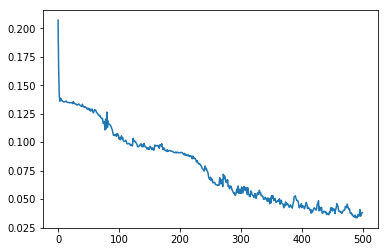

In [15]:
plt.plot(history.history['loss'])

plt.show()


In [16]:
rmse = sqrt(mean_squared_error(results, y_test))
rmse

0.1498588729771363

In [17]:
mse = mean_squared_error(results, y_test)
mse

0.022457681809977467